# Scikit-learn

In [54]:
import csv
import pandas as pd
import numpy as np
import sklearn

### Loading the data

In [55]:
df = pd.read_csv("loan.csv")

### Inspecting the data

In [56]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
print df.shape
print df.dtypes.unique()

(887379, 74)
[dtype('int64') dtype('float64') dtype('O')]


In [58]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [59]:
objects = list(df.select_dtypes(include=['object']).columns)
print objects, len(objects)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint'] 23


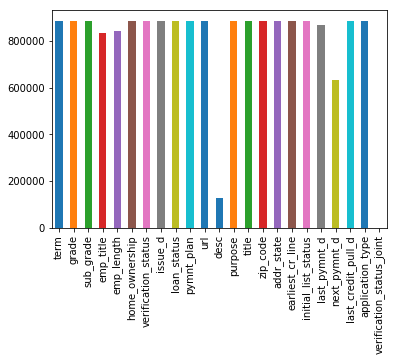

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
df[objects].count().plot.bar()

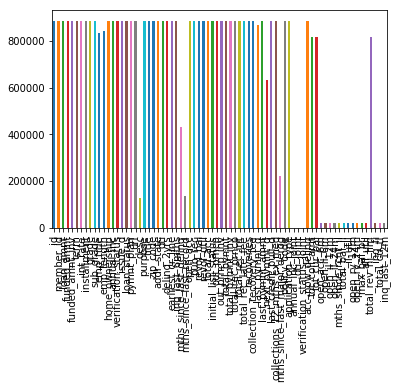

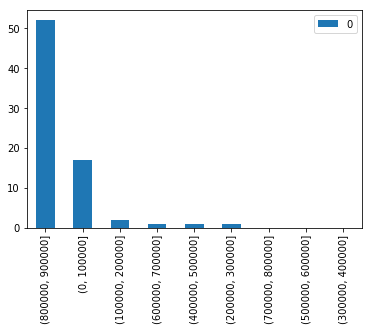

In [61]:
plt.figure()
df.count().plot.bar()
bins = np.arange(0,1000000, 100000)
hist = pd.cut(df.count(), bins).value_counts()
hist.to_frame().plot(kind='bar')

### Selecting attributes

In [62]:
selected = []
n = 800000
for col, count in zip(df.columns, df.count()):
    if count >= n:
        selected.append(col)
print selected
print len(selected)
data = df[selected]

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
52


### Cleaning the data

In [63]:
print "Number of applications: %d" % (len(data))
print "Number of NaNs: %d" % (data.isnull().values.sum())
data = data.dropna(thresh=len(selected))
print "Number of NaNs: %d" % (data.isnull().values.sum())
print "Number of applications: %d" % (len(data))

Number of applications: 887379
Number of NaNs: 325833
Number of NaNs: 0
Number of applications: 752938


### Remove columns that we cannot use

In [64]:
remove = ['member_id','int_rate', 'installment', 'grade', 'sub_grade', 'pymnt_plan',
          'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
          'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d', 'funded_amnt',
          'funded_amnt_inv', 'policy_code', 'issue_d', 'initial_list_status']
data = data.drop(remove, axis=1)
print len(data.columns)


29


                 id      loan_amnt    annual_inc            dti  \
count  7.529380e+05  752938.000000  7.529380e+05  752938.000000   
mean   3.452995e+07   15156.353312  7.674135e+04      18.386580   
std    2.141703e+07    8443.923126  6.592753e+04       8.286554   
min    5.670500e+04    1000.000000  4.000000e+03       0.000000   
25%    1.264568e+07    8800.000000  4.750000e+04      12.160000   
50%    3.817114e+07   14000.000000  6.500000e+04      17.890000   
75%    5.515089e+07   20000.000000  9.100000e+04      24.250000   
max    6.861687e+07   35000.000000  9.500000e+06     380.530000   

         delinq_2yrs  inq_last_6mths       open_acc        pub_rec  \
count  752938.000000   752938.000000  752938.000000  752938.000000   
mean        0.331504        0.671420      11.778436       0.200299   
std         0.888108        0.959545       5.359415       0.593268   
min         0.000000        0.000000       1.000000       0.000000   
25%         0.000000        0.000000       8.0

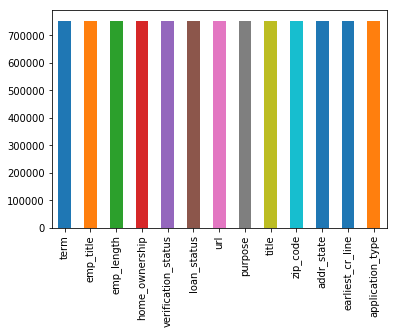

In [65]:
print data.describe()
plt.figure()
objects = list(data.select_dtypes(include=['object']).columns)
data[objects].count().plot.bar()

### Selecting 13 features to use in this initial approach

In [66]:
features = ['emp_length',                # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'loan_amnt',                 # loan amount
            'annual_inc',                # annual income           
            'total_acc',                 # num accounts
            'delinq_2yrs',               # num past delinquencies
            'pub_rec',                   # num public records
            'inq_last_6mths',            # num inquiries past 6 months
            'collections_12_mths_ex_med',# num collections that are not medical in the last year
            'acc_now_delinq',            # num accounts on which is now delinquent         
           ]           

### Finding labels

In [67]:
data.loan_status.value_counts()

Current               554664
Fully Paid            146533
Charged Off            32184
Late (31-120 days)     10562
In Grace Period         5714
Late (16-30 days)       2128
Default                 1113
Issued                    40
Name: loan_status, dtype: int64

In [68]:
status = ['Default', 'Late (31-120 days)', 'Fully Paid', 'Charged Off']
data = data.loc[data.loan_status.isin(status)]

In [69]:
data['label'] = data['loan_status'].apply(lambda x : +1 if x=='Fully Paid' else -1)
default = data.loc[data['label'] == -1]
paid = data.loc[data['label'] == 1]
print "Paid loans: %d, risky: %d" % (len(paid), len(default))
print "Percentage of safe loans  : %s " % (len(paid)* 100.0 / (len(default) + len(paid)))
print "Percentage of risky loans : %s " % (len(default)* 100.0 / (len(default) + len(paid)))

Paid loans: 146533, risky: 43859
Percentage of safe loans  : 76.9638430186 
Percentage of risky loans : 23.0361569814 


### Creating  datasets

In [70]:
dataset_x = default[features].append(paid[features])
dataset_y = default.label.append(paid.label)

### Encoding features

In [71]:
from sklearn import preprocessing

dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: x[:-6] if 'years' in x else '0')
dataset_x.emp_length = dataset_x.emp_length.apply(lambda x: float(x[:-1]) if '+' in x else float(x))
dataset_x.term = dataset_x.term.apply(lambda x: float(x.replace("months","")))

print "Number of total data points: %d, labels:%d" % (len(dataset_x), len(dataset_y))

Number of total data points: 190392, labels:190392


In [72]:
home_own = pd.get_dummies(dataset_x.home_ownership, prefix='p')
dataset_x[home_own.columns] =  home_own

purpose = pd.get_dummies(dataset_x.purpose, prefix='p')
dataset_x[purpose.columns] =  purpose

del dataset_x['purpose']
del dataset_x['home_ownership']
print dataset_x.head(10)

       emp_length    dti  term  loan_amnt  annual_inc  total_acc  delinq_2yrs  \
42550         2.0  15.75  36.0     8000.0     33000.0       16.0          0.0   
42563         5.0  27.03  60.0    10000.0     25000.0       22.0          0.0   
42593         3.0   3.68  36.0    15000.0     60000.0       12.0          0.0   
42619        10.0   8.58  60.0    28000.0    124000.0       40.0          0.0   
42620         0.0  27.98  36.0    13225.0     30192.0       21.0          0.0   
42631         0.0  30.02  60.0    23675.0     54000.0       33.0          0.0   
42644        10.0   4.51  60.0    12000.0     55000.0       20.0          0.0   
42655         5.0  19.69  60.0    19425.0     55000.0       26.0          0.0   
42667         8.0  20.35  60.0    16000.0    105000.0       38.0          1.0   
42676        10.0  13.70  60.0    10600.0     60000.0       20.0          0.0   

       pub_rec  inq_last_6mths  collections_12_mths_ex_med    ...      \
42550      1.0             1.0     

### Model training + cross-validation

In [73]:
print "Dataset shape: ",dataset_x.shape

Dataset shape:  (190392, 30)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=1)


clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
cv_results = cross_validate(clf, X_train, y_train, scoring=scoring)


In [75]:
for s, r in cv_results.items():
    print s, r

neg = y_train[y_train == -1].count()
pos = y_train[y_train == 1].count()
print "Percentage of default in training set: ", (neg*100/pos)

neg2 = y_test[y_test == -1].count()
pos2 = y_test[y_test == 1].count()
print "Percentage of default in testing set: ", (neg2*100/pos2)

train_accuracy [1. 1. 1.]
score_time [4.36545205 4.36729693 4.36040592]
fit_time [18.221977   20.26712298 21.71912003]
test_accuracy [0.76699297 0.76902169 0.76833232]
test_prec [0.78008665 0.78169362 0.78120052]
train_prec [1. 1. 1.]
Percentage of default in training set:  29
Percentage of default in testing set:  30


### ROC curve and AUC

In [ ]:
# Receiver operating characteristic 
# TPR = true positive rate vs. FPR = false positive rate, at various threshold settings
# Here FPR is better -> specificity = 1 - FPR 

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, n_estimators in enumerate([100, 300, 500, 1000, 2000]):
    clf = RandomForestClassifier(n_estimators, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_predict = clf.predict_proba(X_test)
    y_predict_class = clf.predict(X_test)
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict[:,1], pos_label=1)
    print "Accuracy score for %d estimators: %f" % (n_estimators, accuracy_score(y_test, y_predict_class))
    roc_auc[i] = auc(fpr[i], tpr[i])
    
print roc_auc

Accuracy score for 100 estimators: 0.762861
Accuracy score for 300 estimators: 0.764700
Accuracy score for 500 estimators: 0.765514
Accuracy score for 1000 estimators: 0.765698


In [ ]:
import matplotlib.pyplot as plt
plt.figure()

lw = 2 #line width
for i, f in enumerate(fpr):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()